# Hierarchical and K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Generating dataset

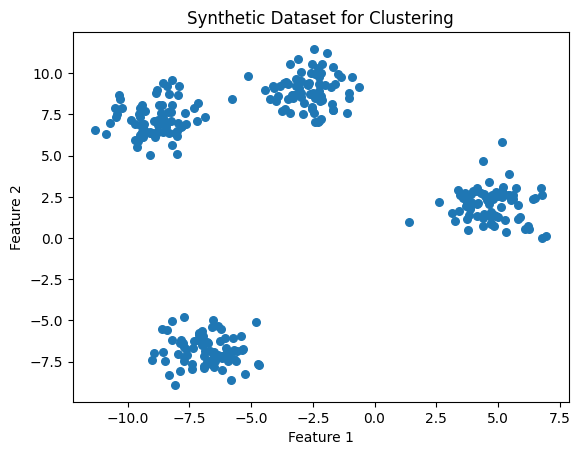

In [2]:
# Generate synthetic dataset
n_samples = 300
n_features = 2
centers = 4  # Number of clusters
random_state = 42

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, random_state=random_state)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Synthetic Dataset for Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## K-means Clustering

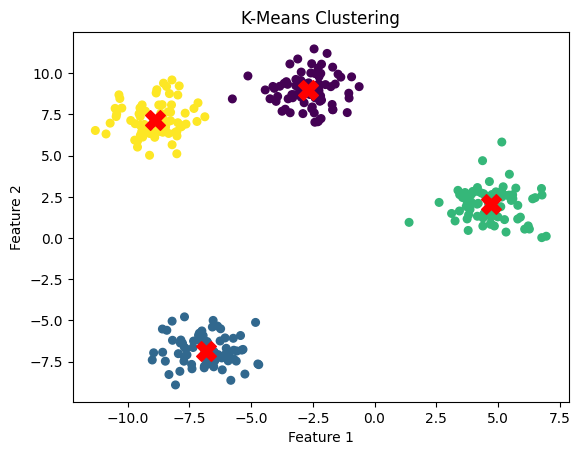

In [3]:
kmeans = KMeans(n_clusters=centers, random_state=random_state)
kmeans_labels = kmeans.fit_predict(X)

# Plot K-Means Clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Hierarchical Clustering (Agglomerative)

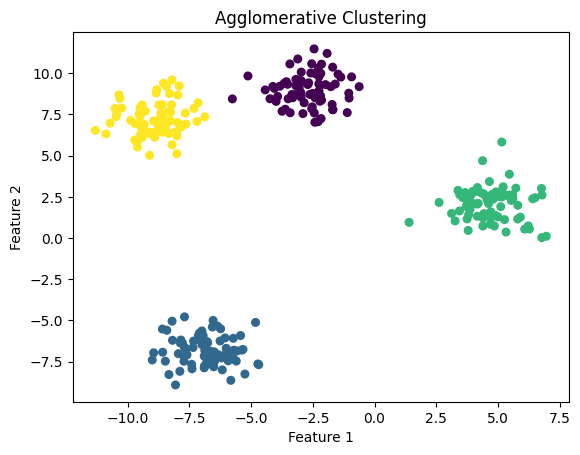

In [4]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=centers, linkage='ward')  # Ward minimizes variance
agg_labels = agg.fit_predict(X)

# Plot Agglomerative Clusters
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=30)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Hierarchical Clustering (Dendogram)

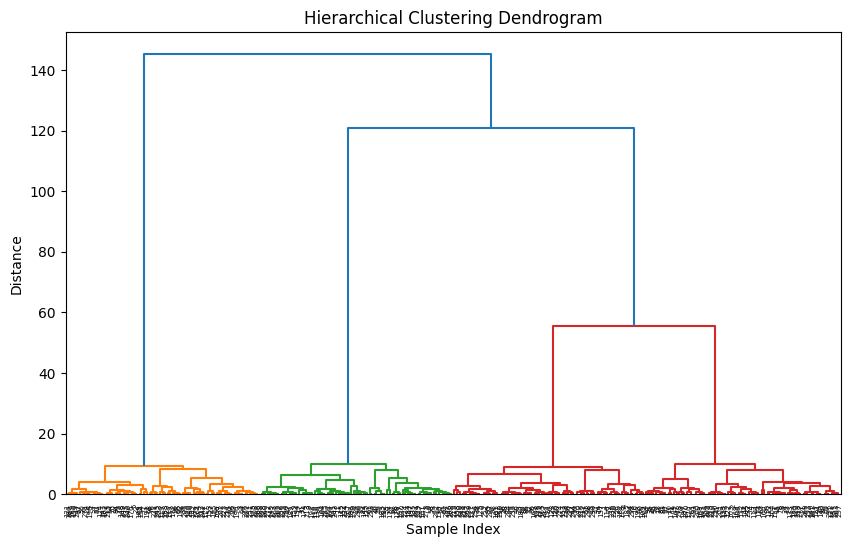

In [5]:
# Compute linkage matrix
linkage_matrix = linkage(X, method='ward')  # Ward's method

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Working with a more complex data set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

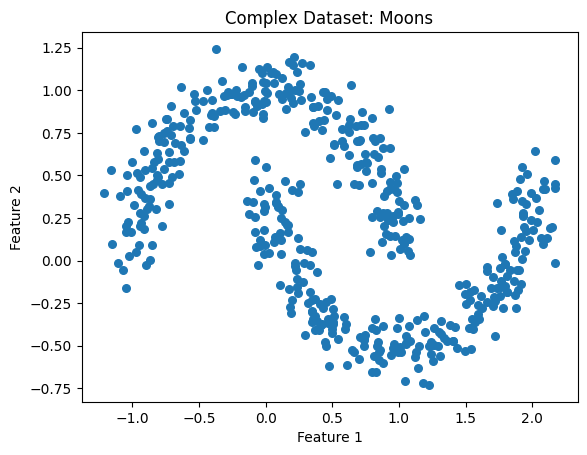

In [7]:
# Generate a complex dataset
X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Complex Dataset: Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

k-means clustering

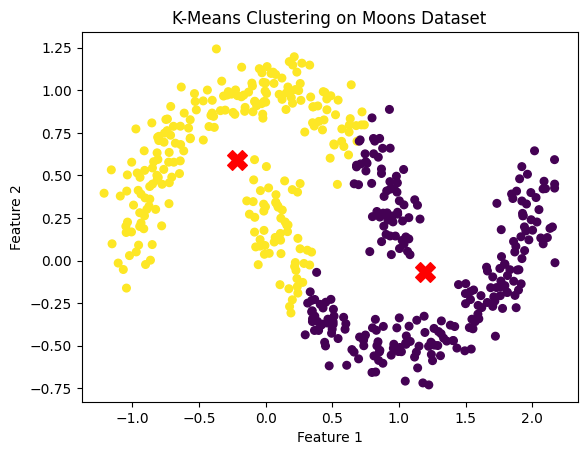

Silhouette Score for K-Means: 0.48
Calinski-Harabasz Index for DBSCAN: 717.07


In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Plot K-Means Clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title("K-Means Clustering on Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# =========================================
# Evaluating with Silhouette Score
# =========================================
silhouette = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette:.2f}")

# Assuming dbscan_labels and X are already defined
calinski_harabasz = calinski_harabasz_score(X, kmeans_labels)
print(f"Calinski-Harabasz Index for DBSCAN: {calinski_harabasz:.2f}")

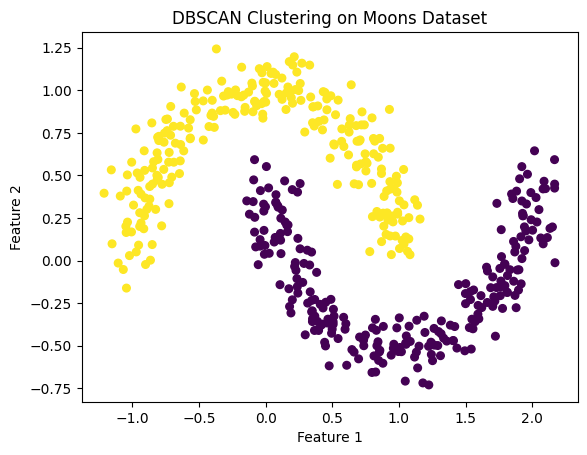

Silhouette Score for K-Means: 0.33
Calinski-Harabasz Index for DBSCAN: 327.85


In [ ]:
# =========================================
# Comparison with DBSCAN (Better for Non-Spherical Clusters)
# =========================================
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score

dbscan = DBSCAN(eps=0.2, min_samples=5) # eps: maximum distance between two samples for one to be considered as in the neighborhood of the other
dbscan_labels = dbscan.fit_predict(X)

# Plot DBSCAN Clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=30)
plt.title("DBSCAN Clustering on Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

silhouette = silhouette_score(X, dbscan_labels)
print(f"Silhouette Score for K-Means: {silhouette:.2f}")

# Assuming dbscan_labels and X are already defined
calinski_harabasz = calinski_harabasz_score(X, dbscan_labels)
print(f"Calinski-Harabasz Index for DBSCAN: {calinski_harabasz:.2f}")

## Determining the optimal number of clusters

Elbow Method:
Plot the total within-cluster variance (inertia) vs. 𝐾

Optimal 𝐾 is at the "elbow," where the rate of decrease slows.

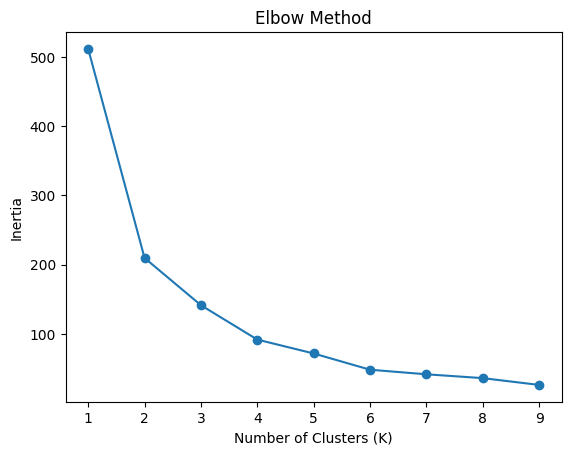

In [14]:
# Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


# Clustering: Key Information

## Clustering Methods and When to Use Them

| Method |	Best For |	Challenges |
| ------- | ---------| ----------- |
| K-Means |	Spherical, isotropic clusters; large datasets. |	Sensitive to initialization; assumes fixed K. |
| ISODATA |	Variable cluster shapes and sizes; dynamic merging and splitting of clusters. |	Requires thresholds for merging and splitting. |
| Dynamic Clustering |	Custom data representations; adaptable to non-standard problems. |	Computationally complex for large datasets. |
| DBSCAN |	Non-spherical clusters; noisy data; density-based clusters. |	Struggles with varying densities and high dimensions. |


## Techniques to Find the Number of Clusters
1. Elbow Method
- Plot  K (number of clusters) vs. inertia (sum of squared distances).
- The optimal K is at the "elbow" where the reduction in inertia slows.

2. Silhouette Score
- Measures how similar a data point is to its own cluster compared to others.
- Higher silhouette scores indicate better-defined clusters.

3. ISODATA
- Dynamically adjusts clusters by merging and splitting.
- Use when cluster sizes or densities vary and K is unknown.


## Key Interview Questions

1. When would you use K-Means, and what are its limitations?
- Use for spherical, isotropic clusters.
- Limitations: sensitive to initialization, struggles with non-spherical clusters.

2. What are alternative methods to K-Means for irregularly shaped clusters?
- Use DBSCAN, Gaussian Mixture Models (GMM), or Agglomerative Clustering.

3. How do you evaluate clustering performance?
- Silhouette Score, Elbow Method, Dunn Index, or Calinski-Harabasz Index.

4. What is ISODATA, and how does it improve over K-Means?
- Merges/splits clusters dynamically; handles varying densities better.

5. Explain the differences between DBSCAN and K-Means.
- DBSCAN is density-based and handles non-spherical clusters; K-Means assumes spherical clusters.


# Comparison of DBSCAN and K-means

| Aspect | K-Means | DBSCAN |
|:------:|:-------:|:------:|
| Cluster Shape | Spherical | Non-spherical |
| Noise Handling | No | Yes |
| Number of Clusters | Must be specified | Automatically determined |
| Density | Assumes uniform density | Handles varying densities |
| Initialization | Random | Not applicable |
| Scalability | Good for large datasets | Struggles with high dimensions |
